In [8]:
from RogerSatchell import rogers_satchell_volatility
from Parkinson import Parkinson
from GarmanKlass import garman_klass__estimator
import YangZhang as yz 
from Closetoclose import close_to_close
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

# Correlation between the five volatility estimators

k = 1 # Set the value k

A = pd.Series(close_to_close(data))
B = garman_klass__estimator(data)
C = pd.Series(Parkinson(data))
D = rogers_satchell_volatility(data)
E = yz.calculate_yang_zhang(data, k)

# A list of the 5 estimators (as dataframes)
estimators = [A,B,C,D,E]

for i, est in enumerate(estimators):
    if not isinstance(est, pd.Series):
        print(f"Estimator {i} is not a pandas Series.")
    if est.isna().any():
        print(f"Estimator {i} contains NaN values.")
    if np.isinf(est).any():
        print(f"Estimator {i} contains infinite values.")

# Computing the correlation matrix
correlation_matrix = np.zeros((5,5))
for i in range(len(estimators)):
    for j in range(len(estimators)):
        print(f"Calculating correlation between estimator {i} and estimator {j}")
        correlation_value = estimators[i].corr(estimators[j])
        print(f"Correlation value for {i} vs {j}: {correlation_value}")
        if not pd.isna(correlation_value):
            correlation_matrix[i, j] = correlation_value



labels = ['Close to close', 'Garman Klass', 'Parkinson', 'Roger Satchell', 'Yang Zhang']

df_correlation = pd.DataFrame(correlation_matrix, index=labels, columns=labels)

print(df_correlation)


[*********************100%%**********************]  1 of 1 completed

Estimator 0 contains NaN values.
Estimator 3 contains NaN values.
Estimator 4 contains NaN values.
Calculating correlation between estimator 0 and estimator 0
Correlation value for 0 vs 0: 1.0
Calculating correlation between estimator 0 and estimator 1
Correlation value for 0 vs 1: 0.6210906777109679
Calculating correlation between estimator 0 and estimator 2
Correlation value for 0 vs 2: 0.731183056062562
Calculating correlation between estimator 0 and estimator 3
Correlation value for 0 vs 3: 0.44165987320671674
Calculating correlation between estimator 0 and estimator 4
Correlation value for 0 vs 4: 0.8483691702489736
Calculating correlation between estimator 1 and estimator 0
Correlation value for 1 vs 0: 0.6210906777109679
Calculating correlation between estimator 1 and estimator 1
Correlation value for 1 vs 1: 1.0
Calculating correlation between estimator 1 and estimator 2
Correlation value for 1 vs 2: 0.967017741850955
Calculating correlation between estimator 1 and estimator 3



/Users/hugo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1]:
from RogerSatchell import rogers_satchell_volatility
from Parkinson import Parkinson
from GarmanKlass import garman_klass__estimator
import YangZhang as yz 
from Closetoclose import close_to_close
import numpy as np
import pandas as pd
import yfinance as yf

# Download data
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

# Set the value k
k = 1 

# Calculate volatility estimations and ensure they are in Series format
A = pd.Series(close_to_close(data))
B = pd.Series(garman_klass__estimator(data))
C = pd.Series(Parkinson(data) if isinstance(Parkinson(data), pd.Series) else Parkinson(data)['column_name'])  # Update 'column_name' as needed
D = pd.Series(rogers_satchell_volatility(data))
E = pd.Series(yz.calculate_yang_zhang(data, k))

# List of the 5 estimators (now all are definitely pandas Series)
estimators = [A, B, C, D, E]

# Computing the correlation matrix
correlation_matrix = np.zeros((5, 5))
for i in range(len(estimators)):
    for j in range(len(estimators)):
        correlation_matrix[i, j] = estimators[i].corr(estimators[j])

# Define labels for readability
labels = ['Close to Close', 'Garman Klass', 'Parkinson', 'Roger Satchell', 'Yang Zhang']
df_correlation = pd.DataFrame(correlation_matrix, index=labels, columns=labels)

# Print the correlation matrix
print(df_correlation)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                Close to Close  Garman Klass  Parkinson  Roger Satchell  \
Close to Close        1.000000      0.621091   0.731183        0.441660   
Garman Klass          0.621091      1.000000   0.967018        0.820563   
Parkinson             0.731183      0.967018   1.000000        0.728378   
Roger Satchell        0.441660      0.820563   0.728378        1.000000   
Yang Zhang            0.848369      0.695364   0.828181        0.479573   

                Yang Zhang  
Close to Close    0.848369  
Garman Klass      0.695364  
Parkinson         0.828181  
Roger Satchell    0.479573  
Yang Zhang        1.000000  



/Users/hugo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

# Téléchargement des données pour SPY comme précédemment
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

# Simulation simple de la vraie volatilité (ici nous utilisons l'écart type des prix de clôture pour simuler)
true_volatility = data['Close'].rolling(window=30).std()

# Assurons que true_volatility est une série complète pour la période (sans NaN au début)
true_volatility = true_volatility.fillna(method='bfill')


[*********************100%%**********************]  1 of 1 completed


In [4]:
# Initialisation du tableau pour stocker les corrélations
correlation_with_true_vol = np.zeros(5)

# Calcul de la corrélation pour chaque estimateur avec la vraie volatilité
for i in range(len(correlation_with_true_vol)):
    correlation_with_true_vol[i] = estimators[i].corr(true_volatility)

# Création du DataFrame pour afficher les résultats
df_corr_true_vol = pd.DataFrame([correlation_with_true_vol], columns=labels)

print("Correlation with True Volatility:\n", df_corr_true_vol)


Correlation with True Volatility:
    Close to Close  Garman Klass  Parkinson  Roger Satchell  Yang Zhang
0        0.443313      0.622307   0.615934        0.552727    0.504924


In [5]:
# Calcul de la variance de la vraie volatilité pour la période considérée
true_variance = true_volatility.var()

# Initialisation du tableau pour stocker les efficiences
efficiency_vector = np.zeros(5)

# Calcul de l'efficacité de chaque estimateur par rapport à la vraie volatilité
for i in range(len(efficiency_vector)):
    efficiency_vector[i] = true_variance / estimators[i].var()

# Création du DataFrame pour afficher les résultats
df_efficiency = pd.DataFrame([efficiency_vector], columns=labels)

print("Efficiency of Estimators:\n", df_efficiency)


Efficiency of Estimators:
    Close to Close  Garman Klass     Parkinson  Roger Satchell    Yang Zhang
0    20253.973378  42809.182226  43364.971547    54721.679971  24670.783472


In [6]:
# Initialisation du tableau pour stocker les MSE
mse_vector = np.zeros(5)

# Calcul du MSE pour chaque estimateur
for i in range(len(mse_vector)):
    mse_vector[i] = np.mean((estimators[i] - true_volatility) ** 2)

# Création du DataFrame pour afficher les résultats
df_mse = pd.DataFrame([mse_vector], columns=labels)

print("Mean Squared Errors:\n", df_mse)


Mean Squared Errors:
    Close to Close  Garman Klass  Parkinson  Roger Satchell  Yang Zhang
0        8.472582      8.471832   8.472463        8.505453    8.468482


In [7]:
data['Date'] = data.index
data['Month'] = data['Date'].dt.to_period('M')

[*********************100%%**********************]  1 of 1 completed
/Users/hugo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


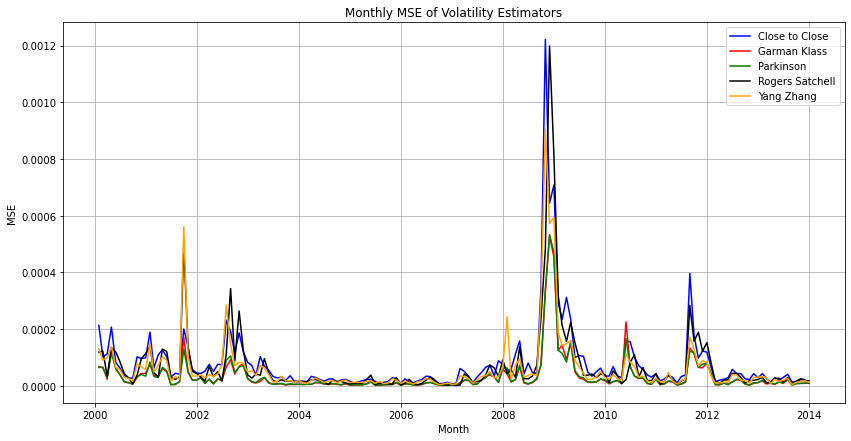

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from RogerSatchell import rogers_satchell_volatility
from Parkinson import Parkinson
from GarmanKlass import garman_klass__estimator
import YangZhang as yz
from Closetoclose import close_to_close
import numpy as np

# Télécharger les données
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

# Assurez-vous que l'index est de type DateTimeIndex
data.index = pd.to_datetime(data.index)

# Calculer les estimateurs de volatilité
data['Estimator1'] = pd.Series(close_to_close(data))
data['Estimator2'] = pd.Series(garman_klass__estimator(data))
data['Estimator3'] = pd.Series(Parkinson(data))
data['Estimator4'] = pd.Series(rogers_satchell_volatility(data))
data['Estimator5'] = pd.Series(yz.calculate_yang_zhang(data, k=1))

# Calculer la vraie volatilité mensuelle (par exemple, l'écart-type mensuel des rendements quotidiens)
data['True_Volatility'] = data['Close'].pct_change().rolling(window=30).std()
data = data.fillna(method='bfill')

# Grouper par mois et calculer la volatilité réelle mensuelle
monthly_true_volatility = data['True_Volatility'].resample('M').mean()

# Calculer le MSE mensuel pour chaque estimateur
def calculate_monthly_mse(estimateur, true_volatility):
    return ((estimateur - true_volatility) ** 2).resample('M').mean()

monthly_mse = pd.DataFrame({
    'Estimator1': calculate_monthly_mse(data['Estimator1'], data['True_Volatility']),
    'Estimator2': calculate_monthly_mse(data['Estimator2'], data['True_Volatility']),
    'Estimator3': calculate_monthly_mse(data['Estimator3'], data['True_Volatility']),
    'Estimator4': calculate_monthly_mse(data['Estimator4'], data['True_Volatility']),
    'Estimator5': calculate_monthly_mse(data['Estimator5'], data['True_Volatility'])
})

# Tracer les données
plt.figure(figsize=(14, 7))

# Ajouter une étiquette de légende explicite et définir les couleurs pour chaque estimateur
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator1'].tolist(), label='Close to Close', color='blue')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator2'].tolist(), label='Garman Klass', color='red')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator3'].tolist(), label='Parkinson', color='green')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator4'].tolist(), label='Rogers Satchell', color='black')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator5'].tolist(), label='Yang Zhang', color='orange')

plt.title('Monthly MSE of Volatility Estimators')
plt.xlabel('Month')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()
